In [1]:
%matplotlib inline

import time
import datetime as dt
import os
import glob
import json

import itertools as it

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

os.getcwd()

'/home/edmz/Data Covid/Code'

In [2]:
from dicts_paths_v3 import *
from calc_functions_v3 import *
from graph_functions_v3 import *
from graph_functions2_v3 import *

Today is 11/04/2021. Retrieve data from how many days? 1
Ok, will retrieve data from 10/04/2021


In [3]:
fname = temp_path(date_choice, 'vacsi-a-dep', 'tot-3C')
dvac = pd.read_csv(fname, sep = ';', 
                parse_dates = ['jour'],
                dtype = {'entity': str},
               )
fname = temp_path(date_choice, 'donnees-hospitalieres-classe-age-covid19', '3C-hebd')
dhos = pd.read_csv(fname, sep = ';', 
                parse_dates = ['jour'],
                dtype = {'entity': str},
               )
fname = temp_path(date_choice, 'sp-pos-quot-dep', 'tot-3C-hebd')
dtes = pd.read_csv(fname, sep = ';', 
                parse_dates = ['jour'],
                dtype = {'entity': str},
               )
d = pd.merge(dtes, dhos, how = 'outer')
d = pd.merge(d, dvac, how = 'outer')
d = d.sort_values(['entity', 'three_class', 'jour'])

./Temp/5Lv3/vacsi-a-dep-2021-04-10-18h31-tot-3C.csv
./Temp/5Lv3/donnees-hospitalieres-classe-age-covid19-2021-04-10-18h18-3C-hebd.csv
./Temp/5Lv3/sp-pos-quot-dep-2021-04-10-18h25-tot-3C-hebd.csv


In [27]:
d.sample(10)

,entity,three_class,jour,P,T,pop,P hebdo,T hebdo,incidence hebdo,positivite hebdo,...,dc hebdo,taux hosp,taux rea,taux décès,n_dose1,n_dose2,n_cum_dose1,n_cum_dose2,taux dose 1,taux dose 2
90218,68,60+,2020-09-04,5.0,546.0,205949.0,31.0,3059.0,15.052270,1.013403,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126476,95,0-29,2021-02-06,127.0,1566.0,509031.0,1172.0,13946.0,230.241380,8.403843,...,NaN,NaN,NaN,NaN,0.0,0.0,352.0,68.0,0.069151,0.013359
130376,973,0-29,2021-01-22,40.0,449.0,161102.0,270.0,3004.0,167.595685,8.988016,...,NaN,NaN,NaN,NaN,1.0,0.0,12.0,0.0,0.007449,0.000000
52429,39,30-59,2021-01-05,84.0,742.0,97073.0,366.0,3628.0,377.035839,10.088203,...,NaN,NaN,NaN,NaN,2.0,0.0,3.0,0.0,0.003090,0.000000
141824,Centre-Val de Loire,0-29,2020-10-06,173.0,2601.0,847343.0,749.0,11898.0,88.393956,6.295176,...,0.0,0.236032,0.000000,0.00000,NaN,NaN,NaN,NaN,NaN,NaN
11021,09,30-59,2020-09-05,4.0,39.0,56230.0,26.0,927.0,46.238663,2.804746,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64300,48,0-29,2021-01-03,2.0,11.0,22585.0,26.0,418.0,115.120655,6.220096,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.000000,0.000000
32621,26,30-59,2021-01-03,10.0,91.0,196800.0,431.0,5047.0,219.004065,8.539727,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.000000,0.000000
157003,Île-de-France,whole,2021-03-19,11791.0,131251.0,12278210.0,69691.0,667046.0,567.599023,10.447705,...,408.0,49.404596,9.977024,3.32296,38678.0,3021.0,940290.0,336971.0,7.658201,2.744464
111784,84,0-29,2020-12-25,1.0,67.0,186896.0,258.0,6722.0,138.044688,3.838143,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
regions = ['Auvergne-Rhône-Alpes',
       'Bourgogne-Franche-Comté', 'Bretagne', 'Centre-Val de Loire',
       'Corse', 'Grand Est', 'Hauts-de-France',
       'Normandie', 'Nouvelle-Aquitaine', 'Occitanie',
       'Pays de la Loire', "Provence-Alpes-Côte d'Azur", 'Île-de-France']

In [5]:
for region in regions:
    print(len(reg2dep[region]))

12
8
4
6
2
10
5
5
12
13
5
6
8


In [10]:
def synthese_par_region(d, region, column_to_plot):
    
    
    deps = reg2dep[region]
    ndeps = len(deps)
    nrows = int(np.ceil((ndeps + 2) / 4))
    ncols = 4
    
    
    fig = plt.figure(constrained_layout=False, figsize = (16, 2 * nrows + 4))
    gs0 = fig.add_gridspec(2, 1, hspace =0.05, height_ratios=[1.5*nrows, 3])
    
    
    
    gs00 = gs0[0,0].subgridspec(ncols=ncols, nrows=nrows, wspace = 0.05, hspace = 0.05)

    
    for i,j in in enumerate(gs00):
        if i < len(deps):
            ax = fig.add_subplot(gs)
            plot_three_curves(ax, d, deps[i], column_to_plot, **graph_options[column_to_plot])
            format_graph(ax, x_axis = 'without', y_labels = ('to_the_left' if i%4 == 0 
                                                             else 'to_the_right' if i%4 == 3 
                                                             else 'without'), **graph_options[column_to_plot])
            ax.set_title(deps[i], 
                         x = 0.05, y = 0.9, 
                         fontdict = {'fontsize': 26,
                                         'fontweight' : 'semibold',
                                         'verticalalignment': 'top',
                                         'horizontalalignment': 'left'},
                         c = 'royalblue', family = 'sans'
                        )
    
    gs10 = gs0[1,0].subgridspec(1, 2, wspace=0.1, hspace=0)
    ax = fig.add_subplot(gs10[0,0])
    plot_three_curves(ax, d, region, column_to_plot, **graph_options[column_to_plot])
    format_graph(ax, x_axis = 'complete', y_labels = 'to_the_left', **graph_options[column_to_plot])
    ax.set_title(region, 
                         x = 0.05, y = 0.9, 
                         fontdict = {'fontsize': 26,
                                         'fontweight' : 'semibold',
                                         'verticalalignment': 'top',
                                         'horizontalalignment': 'left'},
                         c = 'royalblue', family = 'sans'
                        )

    ax = fig.add_subplot(gs10[0,1])
    plot_three_curves(ax, d, 'France entière', column_to_plot, **graph_options[column_to_plot])
    format_graph(ax, x_axis = 'complete', y_labels = 'to_the_right', **graph_options[column_to_plot])
    ax.set_title('France', 
                         x = 0.05, y = 0.9, 
                         fontdict = {'fontsize': 20,
                                         'fontweight' : 'semibold',
                                         'verticalalignment': 'top',
                                         'horizontalalignment': 'left'},
                         c = 'royalblue', family = 'sans'
                        )
    (ax.legend(bbox_to_anchor=[1, 1.5], 
                  loc='center right',
                  labelspacing=0.5,       
                  handlelength=2, 
                  handletextpad=0.5,
                  frameon=True,
                  fontsize = 14,
                  title = graph_options[column_to_plot]['title'],
                  title_fontsize = 14,
                  )
            )
    


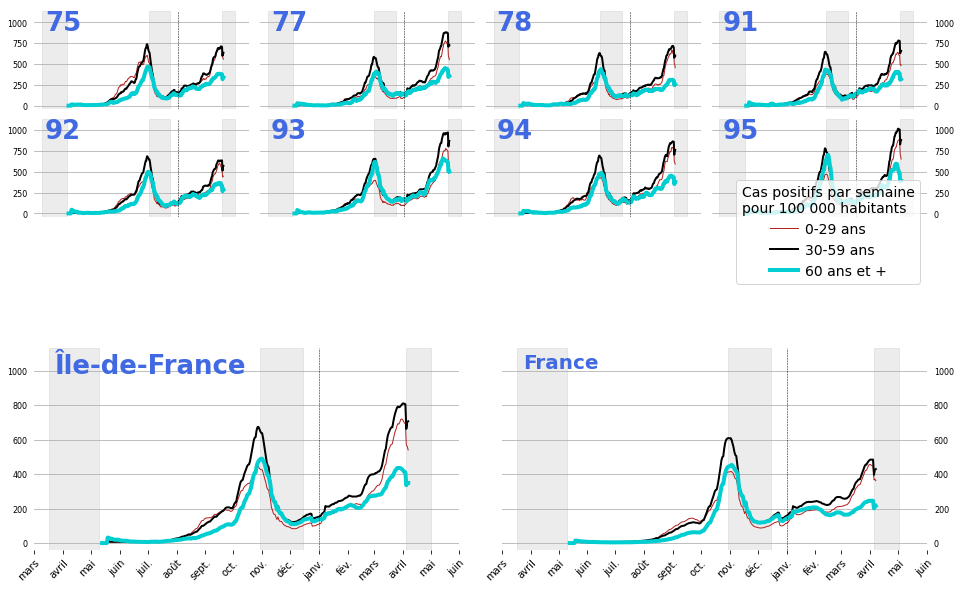

In [11]:
region = 'Île-de-France'
column_to_plot = "incidence hebdo"
synthese_par_region(d, region, column_to_plot)

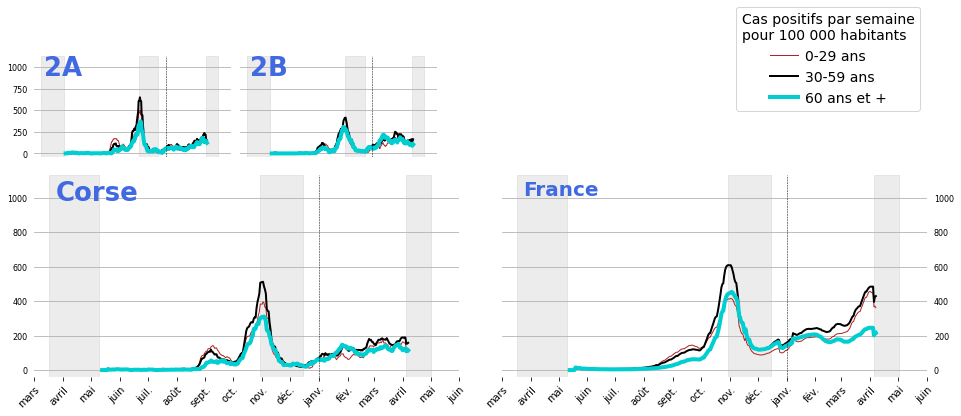

In [6]:
region = 'Corse'
column_to_plot = "incidence hebdo"
synthese_par_region(d, region, column_to_plot)

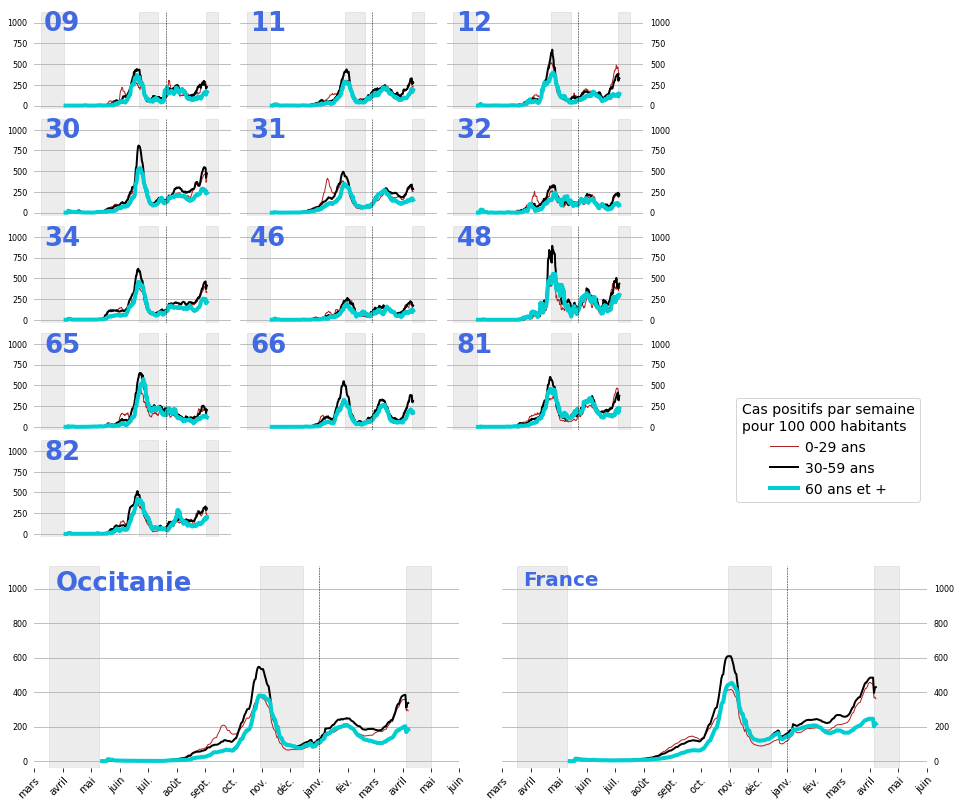

In [7]:
region = 'Occitanie'
column_to_plot = "incidence hebdo"
synthese_par_region(d, region, column_to_plot)